# 1. Perkenalan

Nama : Adnan Rio

Batch : FTDS-014

Dataset : insurance , galaxymorphology

## Objective : 

- Mampu memahami konsep regression dengan Linear Regression.
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression.
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi.
- Mampu memahami konsep regression dengan Logistic Regression.
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression.
- Mampu mengimplementasikan Logistic Regression untuk membuat prediksi.

# 2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import classification_report

# -------------------------------------------------------- LIFE INSURANCE----------------------------------------------

# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dl

In [2]:
#Data Loading from rideshare_kaggle
df = pd.read_csv(r'insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Target: charges

In [3]:
#copy df
df_copy = df.copy()

In [4]:
# melihat persebaran data df, dan mengetahui masing-masing kolom di dalam df
df_copy.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Note: model yang dibuat hanya untuk umur mulai dari 18 tahun

In [5]:
# melihat null vs non-null data df, untuk mengetahui missing value 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tidak ada missing value, proceed to EDA

# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, heatmap, central tendency dan lain sebagainya.

Text(0.5, 1.0, 'Histogram of Insurance Charges')

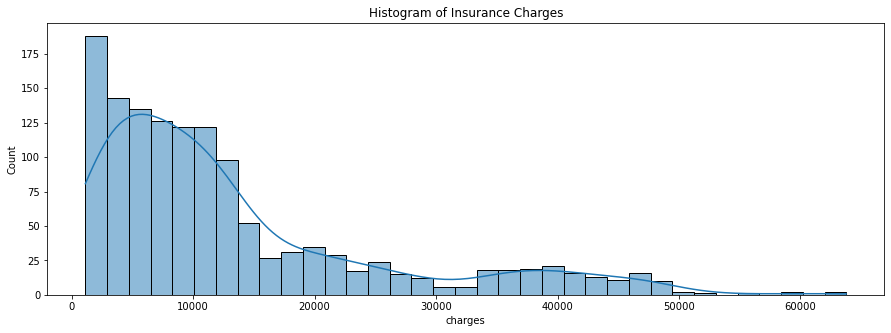

In [6]:
plt.figure(figsize=(15, 5))
sns.histplot(df_copy['charges'], bins=35, kde=True)
plt.title('Histogram of Insurance Charges')

Text(0.5, 1.0, 'age vs charge')

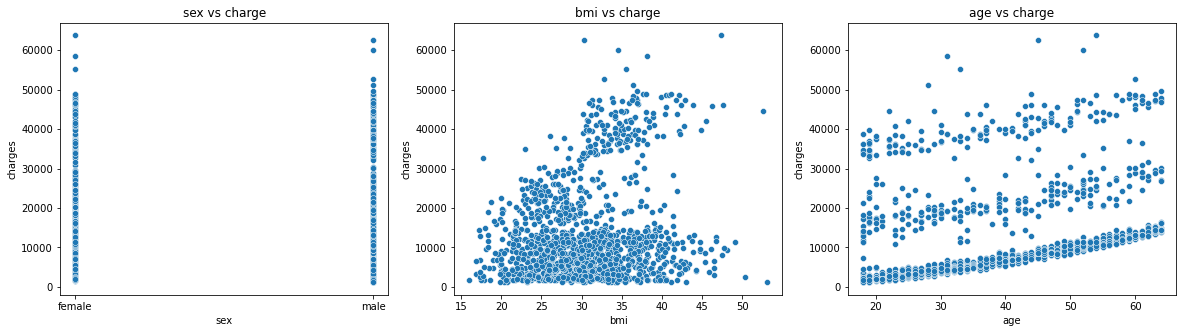

In [7]:
# membuat sactter plot dari sex,bmi,age vs charge 
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)

plt.subplot(1, 3, 1)
sns.scatterplot(x='sex', y='charges', data=df_copy)
plt.title('sex vs charge')

plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=df_copy)
plt.title('bmi vs charge')

plt.subplot(1, 3, 3)
sns.scatterplot(x='age', y='charges', data=df_copy)
plt.title('age vs charge')

sex tidak terlalu berpengaruh, bmi sedikit berpengaruh, age sangat berpengaruh

In [8]:
#groupby sex dengan charges
df_copy.groupby(["sex"])[["charges"]].mean()

,charges
sex,
female,12569.578844
male,13956.751178


sex perlu dikonsiderasikan kembali sebagai salah satu feature yang mempengaruhi charges

In [9]:
#groupby sex-smoker-children dengan charges
df_copy.groupby(["sex","smoker","children"])[["charges"]].mean()

charges
sex    smoker children              
female no     0          7688.318863
              1          8758.560884
              2          9921.777645
              3         10128.716357
              4         13937.674562
              5          8544.113050
       yes    0         30685.059887
              1         30264.253915
              2         31663.833195
              3         30681.604257
              5         19023.260000
male   no     0          7530.806677
              1          7837.147396
              2          9020.567024
              3          9025.530139
              4         10305.014255
              5          7931.658310
       yes    0         31902.398075
              1         32904.876848
              2         35297.837461
              3         33869.169434
              4         26532.276933

smoker dan banyaknya anak juga mempengaruhi perhitungan, dengan data jumlah anak terbanyak adalah 5

In [10]:
#groupby region dengan charges dengan limitation
df_copy[(df_copy['children']==0) & (df_copy['smoker'] == 'no') & (df_copy['bmi'] < 30) & (df_copy['sex'] == 'male') & (df_copy['age'] < 39)].groupby(["region"])[["charges"]].mean()

,charges
region,
northeast,2299.562300
northwest,4538.610515
southeast,2250.791813
southwest,3416.879804


region juga perlu dikonsiderasikan mempengaruhi charges

In [11]:
df_copy[(df_copy['bmi']> 50) & (df_copy['charges']< 10000)]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1317,18,male,53.13,0,no,southeast,1163.4627


In [12]:
df_copy[(df_copy['bmi']> 50) & (df_copy['charges']> 10000)]

,age,sex,bmi,children,smoker,region,charges
1047,22,male,52.58,1,yes,southeast,44501.3982


perbedaan kedua data groupby diatas dapat ditarik kesimpulan bahwa smoker atau tidak mempengaruhi charges sangat tinggi

# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [13]:
#Get data inference sebanyak 30 row sample dan lock randomize.
df_inf = df_copy.sample(30, random_state = 15)
df_inf.shape

(30, 7)

In [14]:
# Hapus data yang dipakai oleh data inference dari df
df_trts = df_copy.drop(df_inf.index)

# Cek ukuran dataset untuk train dan test, telah berkurang 30 row dari 637976:
df_trts.shape

(1308, 7)

In [15]:
# Reset index dari kedua dataframe inference dan data untuk train & test
df_inf.reset_index(drop = True, inplace=True)
df_trts.reset_index(drop = True, inplace=True)
df_trts.iloc[:,:20]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1303,52,female,44.700,3,no,southwest,11411.68500
1304,50,male,30.970,3,no,northwest,10600.54830
1305,18,female,31.920,0,no,northeast,2205.98080
1306,21,female,25.800,0,no,southwest,2007.94500


## Splitting Dataset, y-X and train-test

In [16]:
#Splitting dataset X adalah feature dan y adalah target
X = df_trts.drop('charges', axis = 1)
y = df_trts['charges']

In [17]:
#Splitting dataset menjadi 80% untuk train dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [18]:
#Cek ukuran dataset train dan test untuk memastikan proporsi
print('Train set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

Train set size:  (1046, 6)
Test set size:  (262, 6)


Splitting data berhasil, 30 untuk data inference, 1046 data training, dan 262 data test

## Feature Selection

Feature Selection dilakukan sebelum data preprocessing untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pengolahan data dan menghindari mengolah data yang pada akhirnya tidak terpakai.

In [19]:
#Display X_train to see the features
df_trts.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


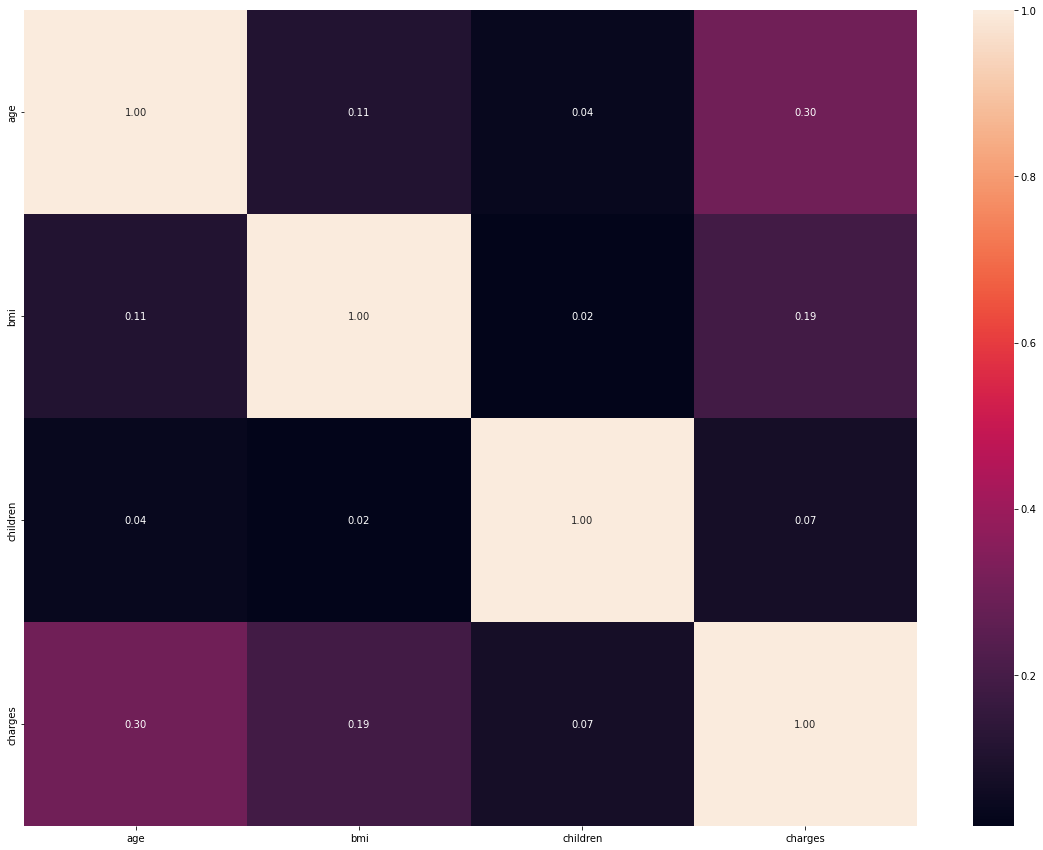

In [20]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(df_trts.corr(), annot=True, fmt='.2f')
plt.show()

Dari heatmap ini dapat terlihat bahwa yang mempunyai korelasi terhadap charges adalah children, bmi and age (diluar yang merupakan kategori). Karena itu 3 kolom ini akan digunakan sebagai feature.

Hasil dari analisa ini EDA dan heatmap sebelumnya, didapatkan bahwa semua kolom memiiliki potensi mempengaruhi charges. Oleh karena itu semua kolom akan dijadikan features.
heatmap: children, bmi and age, EDA: sex, smoker, region

In [21]:
#Keep only featurs that selected
#Features selected:all

X_train_fs = X_train.copy()
X_test_fs = X_test.copy()
X_test_fs.head(5)

,age,sex,bmi,children,smoker,region
1197,41,male,23.940,1,no,northeast
1206,58,male,23.300,0,no,southwest
1049,21,male,31.255,0,no,northwest
730,19,male,21.755,0,no,northwest
1213,52,male,41.800,2,yes,southeast


## Missing value handling

In [22]:
# Looking missing value in X_train
X_train_fs.isnull().sum().sum()

0

In [23]:
# Looking missing value in X_train
X_test_fs.isnull().sum().sum()

0

In [24]:
# Looking missing value in X_train
y_train.isnull().sum().sum()

0

In [25]:
# Looking missing value in X_train
y_test.isnull().sum().sum()

0

Tidak terdapat missing value pada keempat dataset, x dan y pada train dan test lanjutkan kepada proses outlier

## Split between Numerical Columns and Categorical Columns

Data Splitting antara kolom kategori dan numerical dilakukan sebelum outlier untuk memudahkan outlier handling, baik dari sisi grafik dan pengihitungan outlier.

In [26]:
# Memilih feature numerical dan categorical
# Note: children dimasukkan dalam categorical karena menggambarkan sebuah kategori banyaknya anak yang dimiliki

num_col = ['age', 'bmi']
cat_col = ['sex', 'smoker','region','children']

In [27]:
# Split data set sesuai dengan categorical dan numerical
X_train_num = X_train[num_col]
X_train_cat = X_train[cat_col]

X_test_num = X_test[num_col]
X_test_cat = X_test[cat_col]

In [28]:
X_test_num.head(5)

,age,bmi
1197,41,23.940
1206,58,23.300
1049,21,31.255
730,19,21.755
1213,52,41.800


In [29]:
X_test_cat.head(5)

,sex,smoker,region,children
1197,male,no,northeast,1
1206,male,no,southwest,0
1049,male,no,northwest,0
730,male,no,northwest,0
1213,male,yes,southeast,2


## Outliers handling

cara handling outlier: Trimming, treat as missing value and input, capping

In [30]:
# Membuat def fungsi untuk membuat histogram dan boxplot bagi numerical X_train 
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print('skewness:', df[variable].skew())


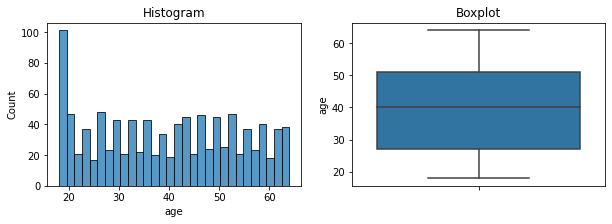

skewness: 0.03788552598021214


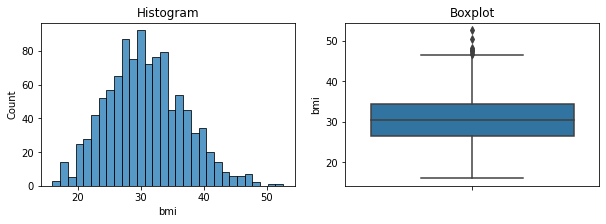

skewness: 0.29096949808144873


In [31]:
#munculkan histogram dan boxplot bagi ketiga feature di X_Traim_num
hist_boxplot(X_train_num, 'age')
hist_boxplot(X_train_num, 'bmi')

Kedua features age dan bmi memiliki distibusi normal bagi age dan skewed bagi bmi.

dengan indikasi outlier pada BMI
Note: Namun outlier pada BMI ini dianggap normal dikarenakan memang ada pengguna asuransi yang memiliki BMI dengan catatan very severely obese. (dianggap sebagai natural outlier) maka outlier tidak dihandling.

## Feature Scaling

### skewed

Dikarenakan ketiga feature pada numeric dataset merupakan skewed maka scaling dilakukan dengan menggunakan minmax scaler

In [35]:
#Split data train menjadi normal dan skewed
X_train_num_norm = X_train_num[['age']]
X_train_num_skewed = X_train_num[['bmi']]

#Split data test menjadi normal dan skewed
X_test_num_norm = X_test_num[['age']]
X_test_num_skewed = X_test_num[['bmi']]

In [36]:
#Feature scaling dengan menggunakan minmax scaler

scaler = MinMaxScaler()
scaler.fit(X_train_num_skewed)

X_train_num_skew_sc = scaler.transform(X_train_num_skewed) #scaling train
X_test_num_skew_sc  = scaler.transform(X_test_num_skewed) #scaling test

In [37]:
X_test_num_skew_sc

array([[0.21791371],
       [0.20043692],
       [0.41766794],
       [0.15824686],
       [0.70562534],
       [0.45917531],
       [0.29055161],
       [0.42326597],
       [0.38121245],
       [0.609503  ],
       [0.54642272],
       [0.52539596],
       [0.26979792],
       [0.49549427],
       [0.33014746],
       [0.53181322],
       [0.45712725],
       [0.19770617],
       [0.5390497 ],
       [0.3806663 ],
       [0.29410158],
       [0.39022392],
       [0.41070453],
       [0.6865101 ],
       [0.33970508],
       [0.29574003],
       [0.25942108],
       [0.31649372],
       [0.58629164],
       [0.28276898],
       [0.29109776],
       [0.49836155],
       [0.37220098],
       [0.20316767],
       [0.51365374],
       [0.25942108],
       [0.44347351],
       [0.27758056],
       [0.45917531],
       [0.25163845],
       [0.45917531],
       [0.47433097],
       [0.83478973],
       [0.4072911 ],
       [0.56444566],
       [0.3915893 ],
       [0.28017477],
       [0.425

### normal

In [38]:
# deklarasikan scaler
scaler2 = StandardScaler()

scaler2.fit_transform(X_train_num_norm)

X_train_num_norm_sc = scaler2.transform(X_train_num_norm) #scaling train
X_test_num_norm_sc  = scaler2.transform(X_test_num_norm) #scaling test

In [39]:
X_test_num_norm_sc

array([[ 0.10496717],
       [ 1.31778479],
       [-1.32187707],
       [-1.4645615 ],
       [ 0.88973151],
       [ 0.88973151],
       [ 1.17510036],
       [-1.39321929],
       [-0.25174389],
       [ 1.10375815],
       [ 0.17630939],
       [-1.17919265],
       [ 1.46046921],
       [-0.18040167],
       [-1.25053486],
       [-0.82248159],
       [-1.17919265],
       [ 0.2476516 ],
       [ 1.31778479],
       [ 0.03362496],
       [-1.53590371],
       [-1.4645615 ],
       [-0.10905946],
       [-0.53711274],
       [-1.4645615 ],
       [-1.03650822],
       [ 0.03362496],
       [-0.25174389],
       [-0.67979716],
       [-0.03771725],
       [-0.60845495],
       [ 1.03241594],
       [-0.53711274],
       [-1.4645615 ],
       [-0.82248159],
       [-0.67979716],
       [ 0.10496717],
       [-0.3230861 ],
       [ 1.03241594],
       [-1.25053486],
       [ 0.03362496],
       [-0.67979716],
       [-0.18040167],
       [-0.96516601],
       [-0.60845495],
       [-0

Scaling telah dilakukan

## Feature Encoding

In [40]:
# Show category dataset
X_test_cat.head(3)

,sex,smoker,region,children
1197,male,no,northeast,1
1206,male,no,southwest,0
1049,male,no,northwest,0


In [41]:
#Split data train menjadi nominal dan none (tidak dilakukan encoding karena telah encoded) category
X_train_cat_nom = X_train_cat[['sex','smoker','region']]
X_train_cat_none = X_train_cat[['children']]

#Split data test menjadi nominal dan none (tidak dilakukan encoding karena telah encoded) category
X_test_cat_nom = X_test_cat[['sex','smoker','region']]
X_test_cat_none = X_test_cat[['children']]


In [42]:
#fit one hot encoder bagi nominal category

encoder = OneHotEncoder()
encoder.fit(pd.DataFrame(X_train_cat_nom))

OneHotEncoder()

In [43]:
#transform dataset nominal train dan test menggunakan onehot encoder
X_train_cat_nom_enc = encoder.transform(pd.DataFrame(X_train_cat_nom)).toarray()
X_test_cat_nom_enc = encoder.transform(pd.DataFrame(X_test_cat_nom)).toarray()

In [44]:
X_train_cat_nom_enc

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.]])

Encoding telah berhasil dilakukan

## Concate between Numerical Columns and Categorical Columns

In [45]:
#Satukan keempat dataset train dan test yang telah melewati proses scaling dan encoding
X_train_fin = np.concatenate([X_train_num_norm_sc, X_train_num_skew_sc, X_train_cat_nom_enc,X_train_cat_none], axis=1)
X_test_fin = np.concatenate([X_test_num_norm_sc, X_test_num_skew_sc, X_test_cat_nom_enc,X_test_cat_none], axis=1)
X_train_fin

array([[ 1.389127  ,  0.23866739,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.32187707,  0.11673949,  0.        , ...,  0.        ,
         0.        ,  3.        ],
       [ 0.10496717,  0.39950847,  0.        , ...,  0.        ,
         0.        ,  2.        ],
       ...,
       [ 0.53302045,  0.33465319,  0.        , ...,  0.        ,
         0.        ,  4.        ],
       [ 0.2476516 ,  0.50354997,  1.        , ...,  0.        ,
         1.        ,  3.        ],
       [-0.53711274,  0.42545057,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

# 6. Model definition

Notes :

Algoritma yang akan dipakai adalah Linear Regression.

Dengan metrics yang akan dipakai untuk mengevaluasi adalah Mean Absolute Error (MAE) untuk mengetahui range eror dati prediksi dan R2 untuk mengetahui % kesesuaian model yang diajukan kepada kondisi aktual

In [46]:
# Training using Linear Regression
model_linreg = LinearRegression()

# 7. Model Training

In [47]:
# Train model menggunakan dataset X dan y train
model_linreg.fit(X_train_fin, y_train)

LinearRegression()

# 8. Model Evaluation

### regression

In [48]:
#Lakukan predict bagi test dan train
y_pred_train = model_linreg.predict(X_train_fin)
y_pred_test = model_linreg.predict(X_test_fin)

In [49]:
#hitung MAE dan R2 dari hasil prediksi train dan test terhadap y 
print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set  : ', mean_absolute_error(y_test, y_pred_test))
print('r2score - Train Set = ', r2_score(y_train, y_pred_train))
print('r2score - Test Set = ', r2_score(y_test, y_pred_test))

MAE - Train Set :  4342.256569715868
MAE - Test Set  :  3783.5803773884986
r2score - Train Set =  0.7398141473759369
r2score - Test Set =  0.7784590084208617


Nilai MAE train set dan test set menggambarkan seberapa besar eror rata-rata per prediksinya yakni +- 4342. Kedua train dan test bernilai berbeda namun memiliki angka yang relatif kecil sehingga dapat ditentukan sebagai overfit terhadap train dikarenakan nilai train lebih rendah

Nilai R2 mencerminkan % kesesuaian model yang dibuat dengan keadaan aktual. Model yang di memiliki kemiripan 73% dengan kondisi aktual, perbedaan antara train dan test lumayan besar. Lebih dari 0.038 = lebih dari 3.8% sehingga dapat dinyatakan sebagai overfit terhadap train

Perlu adanya analisa lebih lanjut mengenai model ini, perlu dicoba untuk handling outlier ataupun mengurangi feature

In [50]:
#print koefisien
model_linreg.coef_

array([  3543.76477312,  13038.65943362,    153.80754282,   -153.80754282,
       -11924.6081097 ,  11924.6081097 ,    499.61073044,    159.67616906,
         -309.55094243,   -349.73595706,    429.63329925])

In [51]:
#print intercept
model_linreg.intercept_

14848.45604385249

# 9. Model Inference

Lakukan test terhadap data inference (data yang akan ada di masa depan)

In [52]:
#munculkan data set inference
df_inf.head(5)

,age,sex,bmi,children,smoker,region,charges
0,35,male,36.67,1,yes,northeast,39774.2763
1,19,female,28.30,0,yes,southwest,17081.0800
2,23,male,32.56,0,no,southeast,1824.2854
3,25,male,26.22,0,no,northeast,2721.3208
4,19,male,30.59,0,no,northwest,1639.5631


In [53]:
#Lihat missing value pada data inference
df_inf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tidak ada missing value pada data inference

In [54]:
#Split data inference berdasarkan kolom numeric dan categoric
data_inf_num = df_inf[num_col]
data_inf_cat = df_inf[cat_col]

Tidak ada handling outliers pada inference

In [55]:
#Scaling dataset numeric ineference
#Split data train menjadi normal dan skewed
X_inf_num_norm = data_inf_num[['age']]
X_inf_num_skewed = data_inf_num[['bmi']]

In [56]:
X_inf_num_skew_sc = scaler.transform(X_inf_num_skewed)
X_inf_num_norm_sc = scaler2.transform(X_inf_num_norm)

In [57]:
#Split data train menjadi nominal dan none (tidak dilakukan encoding karena telah encoded) category
X_inf_cat_nom = data_inf_cat[['sex','smoker','region']]
X_inf_cat_none = data_inf_cat[['children']]


In [58]:
#transform dataset nominal train dan test menggunakan onehot encoder
X_inf_cat_nom_enc = encoder.transform(pd.DataFrame(X_inf_cat_nom)).toarray()


In [59]:
#satukan keempat scaled dan encoded data inference (X_inf_num_sc, X_inf_cat_nom_enc, X_inf_cat_ordinal_enc,X_inf_cat_none)
X_inf_fin = np.concatenate([X_inf_num_norm_sc, X_inf_num_skew_sc, X_inf_cat_nom_enc,X_inf_cat_none], axis=1)
X_inf_fin

array([[-0.3230861 ,  0.56553796,  0.        ,  1.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-1.4645615 ,  0.33697433,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.17919265,  0.45330421,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-1.03650822,  0.28017477,  0.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.4645615 ,  0.39950847,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.18040167,  0.40524304,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         2.   

In [60]:
# Predict using Linear Regression
y_pred_inf = model_linreg.predict(X_inf_fin)

In [61]:
# Create Dataframe of Rating's Prediction
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Charges_Predicted'])
y_pred_inf_df

,Charges_Predicted
0,33777.416324
1,25780.767829
2,4192.187230
3,3249.613169
4,2948.709931
5,8271.895974
6,1207.707817
7,35616.530228
8,8247.838230
9,8428.071189


In [62]:
# Concate between Inference-Set and Rating's Prediction

df_inf_fin = pd.concat([df_inf, y_pred_inf_df], axis=1)
df_inf_fin.head(3)

,age,sex,bmi,children,smoker,region,charges,Charges_Predicted
0,35,male,36.67,1,yes,northeast,39774.2763,33777.416324
1,19,female,28.30,0,yes,southwest,17081.0800,25780.767829
2,23,male,32.56,0,no,southeast,1824.2854,4192.187230


In [63]:
#Showing actual vs predicted price
df_inf_fin[['charges','Charges_Predicted']]

,charges,Charges_Predicted
0,39774.27630,33777.416324
1,17081.08000,25780.767829
2,1824.28540,4192.187230
3,2721.32080,3249.613169
4,1639.56310,2948.709931
5,6313.75900,8271.895974
6,3208.78700,1207.707817
7,48885.13561,35616.530228
8,6393.60345,8247.838230
9,6406.41070,8428.071189


# 10. Pengambilan Kesimpulan

Kesimpulan:

Dari proses EDA semua features diambil, namun model yang dihasilkan overfit dan perlu adanya penyesuaian lebih lanjut mungkin berupa handling outlier, analisa EDA lebih mendalam dan pengurangan feature.


# ----------------------------------------------------------- GALAXY--------------------------------------------

# 3. Data Loading

In [64]:
df2 = pd.read_csv(r'GalaxyMorphology.csv')
df2.head(5)

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,0,1.854829,6.560199,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,1,4.815538,25.950829,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,2,0.678056,6.867416,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,3,-0.547708,11.877941,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,4,2.028543,20.458965,0.446453,0.839216,0.801140,1.107665,0.610453,1


Hanya ambil kolom C, A , S, G2, dan H untuk dijadikan features.
Gunakan kolom CNN2classes1stClass sebagai target
0 elips, 1 spiral

In [65]:
# melihat persebaran data df, dan mengetahui masing-masing kolom di dalam df
df2.describe()

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,0.395287,18.708788,-1846.175115,0.323992,-3.220560,0.747130,0.655137,0.807200
std,5773.647028,2.432726,26.185899,3880.385347,70.716614,199.980672,70.720857,0.113237,0.394507
min,0.000000,-2.913205,1.471492,-9999.999999,-9999.999999,-9999.999999,-9999.999999,0.017008,0.000000
25%,4999.750000,-1.952929,7.039827,0.292831,0.782718,0.757618,0.979765,0.585356,1.000000
50%,9999.500000,-0.071197,11.781205,0.365902,0.859172,0.844121,1.364905,0.659603,1.000000
75%,14999.250000,2.376115,20.920884,0.437227,0.905404,0.889421,1.606039,0.743029,1.000000
max,19999.000000,7.773612,1035.467764,0.761184,0.986535,0.979032,1.953389,0.929947,1.000000


minimum semua kolom menunjukkan angka negative maka data dianggap normal

In [66]:
# melihat null vs non-null data df, untuk mengetahui missing value 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20000 non-null  int64  
 1   TType                20000 non-null  float64
 2   K                    20000 non-null  float64
 3   C                    20000 non-null  float64
 4   A                    20000 non-null  float64
 5   S                    20000 non-null  float64
 6   G2                   20000 non-null  float64
 7   H                    20000 non-null  float64
 8   CNN2classes1stClass  20000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [67]:
#lakukan copy dataframe
df2_copy=df2.copy()

Tidak ada missing value

# 4. Exploratory Data Analysis (EDA)

In [68]:
dfclass1 = df2_copy[df2_copy['CNN2classes1stClass'] == 1]
dfclass1.shape

(16144, 9)

In [69]:
dfclass1 = df2_copy[df2_copy['CNN2classes1stClass'] == 0]
dfclass1.shape

(3856, 9)

16144 data merupakan galaksi spiral sedangkan 3856 data merupakan galaksi elips

# 5. Data Preprocessing

## Get Data for Model Inference

In [70]:
#Get data inference sebanyak 30 row sample dan lock randomize.
df2_inf = df2_copy.sample(30, random_state = 15)
df2_inf.shape

(30, 9)

In [71]:
df2_inf.head(5)

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
1982,1982,-2.128870,14.935841,0.416424,0.926847,0.864207,0.990370,0.600955,1
8128,8128,0.348503,8.410665,0.379042,0.934174,0.898294,1.600803,0.742912,1
12249,12249,-0.272559,9.088095,0.432886,0.796048,0.547697,0.738056,0.552403,1
16470,16470,1.847567,11.566695,0.377057,0.744516,0.866371,1.385533,0.716934,1
16491,16491,-2.030807,35.456617,0.395129,0.433349,0.473974,0.436264,0.510463,1


In [72]:
# Hapus data yang dipakai oleh data inference dari df
df2_trts = df2_copy.drop(df_inf.index)

# Cek ukuran dataset untuk train dan test, telah berkurang 30 row dari 637976:
df2_trts.shape

(19970, 9)

In [73]:
# Reset index dari kedua dataframe inference dan data untuk train & test
df2_inf.reset_index(drop = True, inplace=True)
df2_trts.reset_index(drop = True, inplace=True)

In [74]:
df2_trts.head(5)

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,30,-2.085197,2.218406,-9999.999999,0.882801,0.945958,1.074222,0.633189,0
1,31,-2.229064,4.092745,0.438301,0.933308,0.897168,1.573343,0.682874,0
2,32,-0.093013,4.896928,0.461360,0.878975,0.883634,1.132096,0.606504,1
3,33,1.981072,25.677571,0.388158,0.904202,0.854784,1.019575,0.622953,1
4,34,1.291541,14.598425,0.355614,0.914545,0.911543,1.256038,0.690537,1


## Splitting Dataset, y-X and train-test

In [75]:
#Splitting dataset X adalah feature dan y adalah target
X2 = df2_trts.drop('CNN2classes1stClass', axis = 1)
y2 = df2_trts['CNN2classes1stClass']

In [76]:
#Splitting dataset menjadi 80% untuk train dan 20% untuk test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=15)

In [77]:
X2_train.shape

(15976, 8)

In [78]:
X2_test.shape

(3994, 8)

data telah terbagi menjadi 80% train dan 20% test

## Feature Selection

Feature Selection dilakukan sebelum data preprocessing untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pengolahan data dan menghindari mengolah data yang pada akhirnya tidak terpakai.

In [79]:
#Display X_train to see the features
X2_train.head()

,Unnamed: 0,TType,K,C,A,S,G2,H
7012,7042,1.730602,14.372106,0.271918,0.891497,0.937695,1.688500,0.813460
18399,18429,3.270607,45.266067,0.323642,0.797569,0.912599,1.679251,0.814709
8795,8825,1.481497,15.920034,0.380245,0.546805,0.832224,1.747557,0.847708
508,538,1.238218,26.405201,0.297398,0.625650,0.852599,1.741030,0.791612
12839,12869,1.199285,7.829304,0.427757,0.858630,0.857419,1.402125,0.664421


In [80]:
#Keep only featurs that selected
# Hanya ambil kolom C, A , S, G2, dan H untuk dijadikan features.
X2_train_fs = X2_train.loc[:,['C','A', 'S','G2','H']]
X2_test_fs = X2_test.loc[:,['C','A', 'S','G2','H']]
X2_test_fs

,C,A,S,G2,H
14765,0.424968,0.872930,0.734602,1.167740,0.608857
15439,0.309627,0.676013,0.892189,1.544662,0.779255
11068,0.629931,0.622700,0.720421,1.533061,0.772082
835,-9999.999999,0.948532,0.781240,0.563987,0.487803
3264,0.265401,0.723826,0.941022,1.609149,0.717689
...,...,...,...,...,...
9879,0.354439,0.859599,0.849972,1.825531,0.836971
980,-9999.999999,0.826817,0.830616,1.507958,0.690728
5861,0.460645,0.838119,0.799374,1.381821,0.626260
282,0.336076,0.904583,0.910496,1.606592,0.734432


# Missing value handling

Tidak ada missing value sehingga tidak diperlukan handling

# Split between Numerical Columns and Categorical Columns

Tidak terdapat perbedaan numerical categrical disini, maka semua kolom dianggap numerical

In [81]:
#Memilih feature numerical dan categorical
#Note: Surge_multiplier dimasukkan dalam categorical karena menggambarkan sebuah kategori demand

num_col = ['A', 'H']
cat_col = ['C', 'S','G2']

In [82]:
# Split data set sesuai dengan categorical dan numerical
X2_train_num = X2_train[num_col]
X2_train_cat = X2_train[cat_col]

X2_test_num = X2_test[num_col]
X2_test_cat = X2_test[cat_col]

# Outliers handling

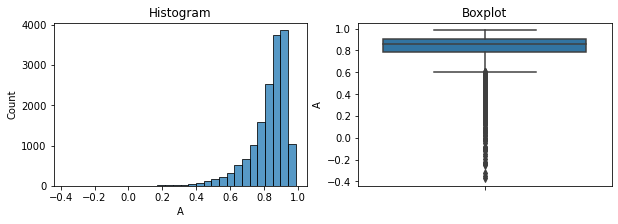

skewness: -2.4088863112478696


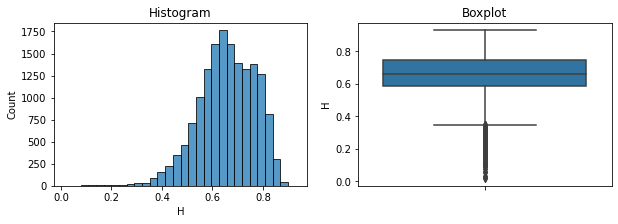

skewness: -0.6325194277397457


In [83]:
hist_boxplot(X2_train, 'A')
hist_boxplot(X2_train, 'H')

kedua data skew, namun dianggap natural outliers karena mengenai data galaxy yang mungkin saja memmungkinkan adanya outlier natural. Sehingga diputuskan untuk tidak melakukan handling outlier

# Feature Scaling

In [84]:
#Feature scaling dengan menggunakan minmax scaler
scaler3 = MinMaxScaler()
scaler3.fit(X2_train_num)

X2_train_num_sc = scaler3.transform(X2_train_num ) #scaling train
X2_test_num_sc = scaler3.transform(X2_test_num ) #scaling test


# Feature Encoding

In [85]:
# Show category dataset
X2_train_cat.head(3)

,C,S,G2
7012,0.271918,0.937695,1.688500
18399,0.323642,0.912599,1.679251
8795,0.380245,0.832224,1.747557


Semua kolom dianggap category none karena merupakan angka, sehingga dilakukan encoding menggunakan standard scaler

In [86]:
# deklarasikan scaler
scaler4 = StandardScaler()

# scale data training
scaler4.fit_transform(X2_train_cat)

# scale data test
X2_train_cat_sc = scaler4.transform(X2_train_cat) #scaling train
X2_test_cat_sc = scaler4.transform(X2_test_cat) #scaling test

# Concate between Numerical Columns and Categorical Columns

In [87]:
#Satukan keduat dataset train dan test yang telah melewati proses scaling dan encoding
X2_train_fin = np.concatenate([X2_train_num_sc, X2_train_cat_sc], axis=1)
X2_test_fin = np.concatenate([X2_test_num_sc, X2_test_cat_sc], axis=1)
X2_train_fin

array([[0.93008072, 0.87240503, 0.47714177, 0.0201969 , 0.01351843],
       [0.86097813, 0.87377302, 0.47715507, 0.02006739, 0.01340153],
       [0.67649187, 0.909918  , 0.47716964, 0.0196526 , 0.01426481],
       ...,
       [0.67669648, 0.95761864, 0.47714764, 0.0200838 , 0.01498704],
       [0.95018602, 0.78965659, 0.47715886, 0.01997194, 0.01341296],
       [0.8984619 , 0.63506752, 0.47719494, 0.01955069, 0.00579371]])

# 6. Model definition

Algoritma yang akan dipakai adalah Logistic Regression.

Dengan metrics yang akan dipakai untuk mengevaluasi adalah classification report

In [88]:
#Training using Legistic regression
log_model = LogisticRegression()

# 7. Model Training

In [89]:
# Train model menggunakan dataset X dan y train
log_model.fit(X2_train_fin, y2_train)

LogisticRegression()

# 8. Model Evaluation

In [90]:
#Lakukan predict bagi test dan train
y2_pred_train = log_model.predict(X2_train_fin)
y2_pred_test = log_model.predict(X2_test_fin)

In [91]:
#Lakukan evaluasi menggunakan classification report

print(classification_report(y2_test,y2_pred_test))

              precision    recall  f1-score   support

           0       0.47      0.13      0.21       718
           1       0.84      0.97      0.90      3276

    accuracy                           0.82      3994
   macro avg       0.66      0.55      0.55      3994
weighted avg       0.77      0.82      0.77      3994



accuracy score yang dibaca adalah yang bernilai 1 = spiral bernilai 1, precission hanya 0.84 dan accuracy mencapai 0.82 sehingga 82% prediksi adalah benar

# 9. Model Inference

In [92]:
#munculkan data set inference
df2_inf.head(5)

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,1982,-2.128870,14.935841,0.416424,0.926847,0.864207,0.990370,0.600955,1
1,8128,0.348503,8.410665,0.379042,0.934174,0.898294,1.600803,0.742912,1
2,12249,-0.272559,9.088095,0.432886,0.796048,0.547697,0.738056,0.552403,1
3,16470,1.847567,11.566695,0.377057,0.744516,0.866371,1.385533,0.716934,1
4,16491,-2.030807,35.456617,0.395129,0.433349,0.473974,0.436264,0.510463,1


In [93]:
#Lihat missing value pada data inference
df2_inf.isnull().sum()

Unnamed: 0             0
TType                  0
K                      0
C                      0
A                      0
S                      0
G2                     0
H                      0
CNN2classes1stClass    0
dtype: int64

Tidak ada mising value

In [94]:
#Split data inference berdasarkan kolom numeric dan categoric
df2_inf_num = df2_inf[num_col]
df2_inf_cat = df2_inf[cat_col]

In [95]:
df2_inf_num

,A,H
0,0.926847,0.600955
1,0.934174,0.742912
2,0.796048,0.552403
3,0.744516,0.716934
4,0.433349,0.510463
5,0.553604,0.676748
6,0.853010,0.513439
7,0.918895,0.673897
8,0.798768,0.460549
9,0.766026,0.383268


tidak ada handling outliers

In [103]:
#scaling
df2_inf_num_sc = scaler3.transform(df2_inf_num) #scaling train

In [104]:
#encoding
df2_inf_cat_sc = scaler4.transform(df2_inf_cat) #scaling train

In [105]:
#satukan kedua scaled dan encoded data inference
X2_inf_fin = np.concatenate([df2_inf_num_sc, df2_inf_cat_sc], axis=1)
X2_inf_fin

array([[ 9.56088197e-01,  6.39634471e-01,  4.77178944e-01,
         1.98176498e-02,  4.69528949e-03],
       [ 9.61478541e-01,  7.95128904e-01,  4.77169326e-01,
         1.99935645e-02,  1.24100930e-02],
       [ 8.59859622e-01,  5.86451602e-01,  4.77183179e-01,
         1.81842473e-02,  1.50648516e-03],
       [ 8.21947035e-01,  7.66673703e-01,  4.77168815e-01,
         1.98288199e-02,  9.68945228e-03],
       [ 5.93022144e-01,  5.40512263e-01,  4.77173465e-01,
         1.78037888e-02, -2.30764264e-03],
       [ 6.81493561e-01,  7.22655617e-01,  4.77152313e-01,
         1.98962716e-02,  6.62119752e-03],
       [ 9.01765986e-01,  5.43772197e-01,  4.77198451e-01,
         1.91123749e-02, -4.31053046e-04],
       [ 9.50237506e-01,  7.19532136e-01,  4.77163662e-01,
         2.01507911e-02,  1.08272657e-02],
       [ 8.61860501e-01,  4.85838623e-01, -2.09566996e+00,
         1.58882138e-02, -2.41607691e-03],
       [ 8.37772519e-01,  4.01187216e-01,  4.77188354e-01,
         1.54672748e-02

In [106]:
#Lakukan predict
y2_pred_inf = log_model.predict(X2_inf_fin)

In [108]:
# Create Dataframe of Prediction
y2_pred_inf_df = pd.DataFrame(y2_pred_inf, columns=['Galaxy_Predicted'])
y2_pred_inf_df

,Galaxy_Predicted
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [109]:
# Concate between Inference-Set and Rating's Prediction

df2_inf_final = pd.concat([df2_inf, y2_pred_inf_df], axis=1)

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass,Galaxy_Predicted
0,1982,-2.128870,14.935841,0.416424,0.926847,0.864207,0.990370,0.600955,1,1
1,8128,0.348503,8.410665,0.379042,0.934174,0.898294,1.600803,0.742912,1,1
2,12249,-0.272559,9.088095,0.432886,0.796048,0.547697,0.738056,0.552403,1,1


In [110]:
df2_inf_final 

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass,Galaxy_Predicted
0,1982,-2.128870,14.935841,0.416424,0.926847,0.864207,0.990370,0.600955,1,1
1,8128,0.348503,8.410665,0.379042,0.934174,0.898294,1.600803,0.742912,1,1
2,12249,-0.272559,9.088095,0.432886,0.796048,0.547697,0.738056,0.552403,1,1
3,16470,1.847567,11.566695,0.377057,0.744516,0.866371,1.385533,0.716934,1,1
4,16491,-2.030807,35.456617,0.395129,0.433349,0.473974,0.436264,0.510463,1,1
5,201,2.175791,48.346489,0.312913,0.553604,0.879441,1.142758,0.676748,1,1
6,17323,-2.337112,16.760221,0.492248,0.853010,0.727543,0.584749,0.513439,1,1
7,15923,-2.088288,6.805381,0.357027,0.918895,0.928761,1.475562,0.673897,0,1
8,11095,-1.338207,24.099721,-9999.999999,0.798768,0.102787,0.427684,0.460549,0,1
9,999,-2.319398,171.226302,0.453001,0.766026,0.021220,0.094132,0.383268,0,1


Terlihat bahwa hasil prediksi model hanya 2 dari 30 data yang salah, maka data adalah good fit